In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('Mall_Customers.csv')

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


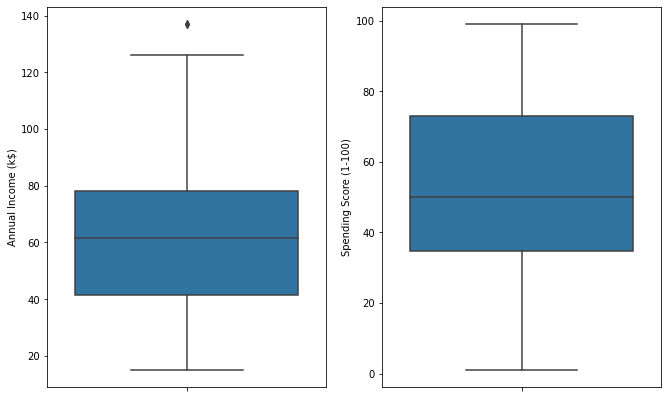

In [7]:
plt.figure(figsize=(11,7))

plt.subplot(1,2,1)
sns.boxplot(data=df, y="Annual Income (k$)")

plt.subplot(1,2,2)
sns.boxplot(data=df, y="Spending Score (1-100)")

plt.show()

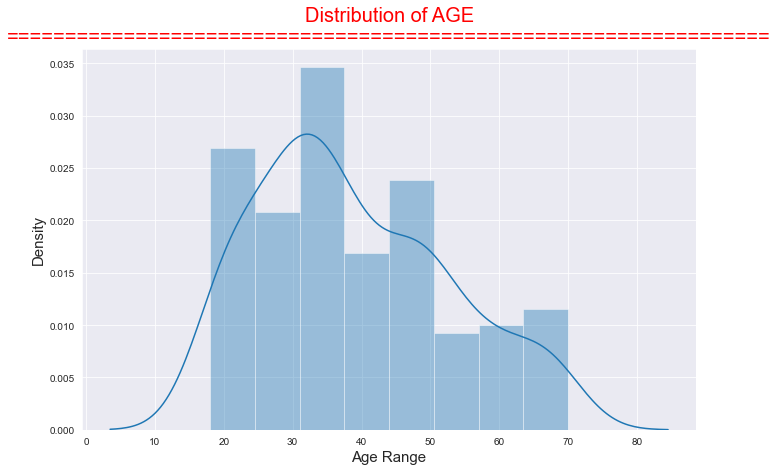

In [9]:
plt.figure(figsize=(11,7))
sns.set_style('darkgrid')

sns.distplot(df.Age)
plt.title("Distribution of AGE\n=================================================================", fontsize=20, color="red")
plt.xlabel("Age Range", fontsize=15)
plt.ylabel("Density", fontsize=15)

plt.show()

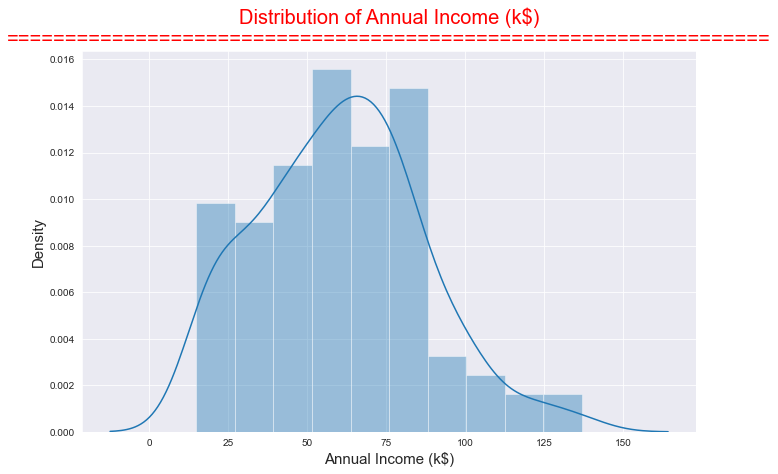

In [10]:
plt.figure(figsize=(11,7))
sns.set_style('darkgrid')

sns.distplot(df["Annual Income (k$)"])
plt.title("Distribution of Annual Income (k$)\n=================================================================", fontsize=20, color="red")
plt.xlabel("Annual Income (k$)", fontsize=15)
plt.ylabel("Density", fontsize=15)
plt.show()

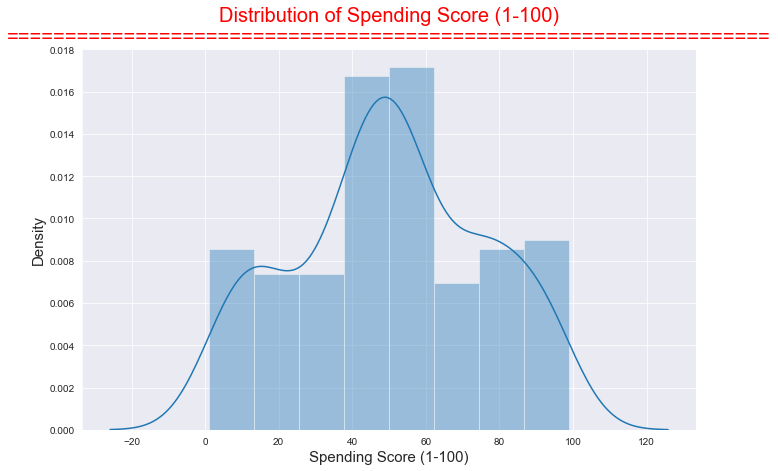

In [11]:
plt.figure(figsize=(11,7))
sns.set_style('darkgrid')

sns.distplot(df["Spending Score (1-100)"])
plt.title("Distribution of Spending Score (1-100)\n=================================================================", fontsize=20, color="red")
plt.xlabel("Spending Score (1-100)", fontsize=15)
plt.ylabel("Density", fontsize=15)
plt.show()

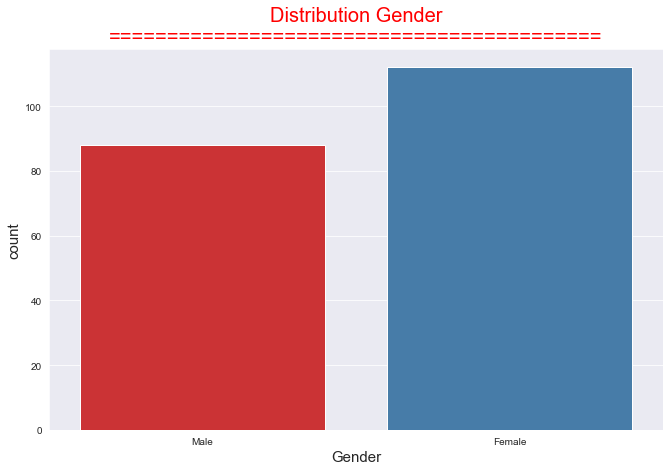

In [13]:
plt.figure(figsize=(11,7))
sns.set_style('darkgrid')

plt.title("Distribution Gender\n==========================================", fontsize=20, color="red")
plt.xlabel("Gender", fontsize=15)
plt.ylabel("Count", fontsize=15)
sns.countplot(df.Gender, palette="Set1")
plt.show()

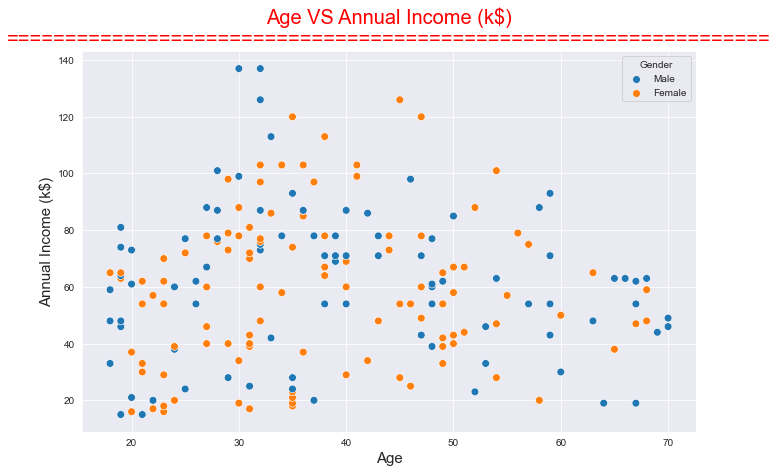

In [14]:
plt.figure(figsize=(11,7))
sns.set_style('darkgrid')

sns.scatterplot(data=df, x="Age", y= "Annual Income (k$)", hue="Gender", s=60)
plt.title("Age VS Annual Income (k$)\n=================================================================", fontsize=20, color="red")
plt.xlabel("Age", fontsize=15)
plt.ylabel("Annual Income (k$)", fontsize=15)
plt.show()

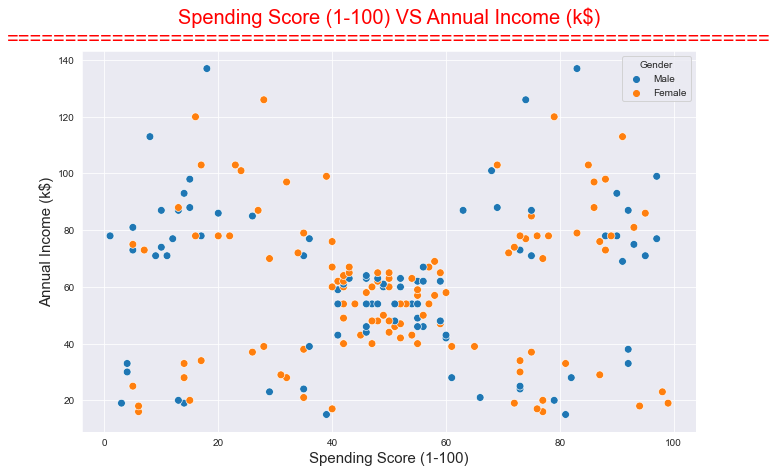

In [15]:
plt.figure(figsize=(11,7))
sns.set_style('darkgrid')

sns.scatterplot(data=df, x="Spending Score (1-100)", y= "Annual Income (k$)", hue="Gender", s=60)
plt.title("Spending Score (1-100) VS Annual Income (k$)\n=================================================================", fontsize=20, color="red")
plt.xlabel("Spending Score (1-100)", fontsize=15)
plt.ylabel("Annual Income (k$)", fontsize=15)
plt.show()

In [16]:
Age_18_25 = df.Age[(df.Age>=18) & (df.Age<=25)]
Age_26_35 = df.Age[(df.Age>=26) & (df.Age<=35)]
Age_36_45 = df.Age[(df.Age>=36) & (df.Age<=45)]
Age_46_55 = df.Age[(df.Age>=46) & (df.Age<=55)]
Age_55_Above = df.Age[(df.Age>=56)]

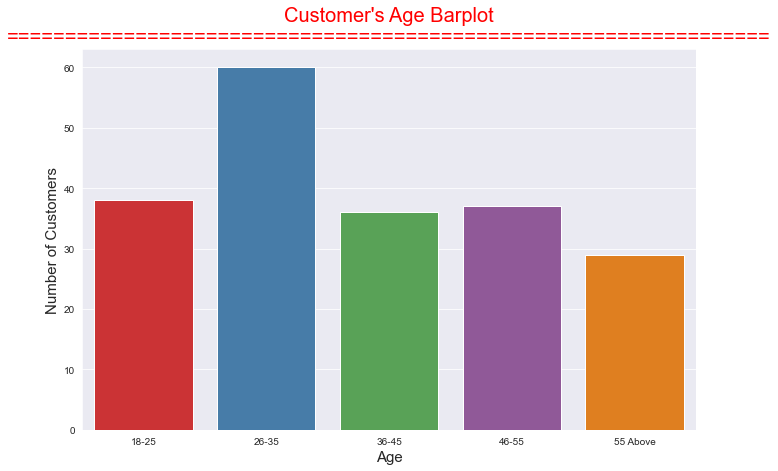

In [17]:
x = ["18-25","26-35","36-45","46-55","55 Above"]
y = [len(Age_18_25.values),len(Age_26_35.values),len(Age_36_45.values),len(Age_46_55.values),len(Age_55_Above.values)]

plt.figure(figsize=(11,7))
sns.barplot(x=x, y=y, palette="Set1")
plt.title("Customer's Age Barplot\n=================================================================", fontsize=20, color="red")
plt.xlabel("Age", fontsize=15)
plt.ylabel("Number of Customers", fontsize=15)
plt.show()

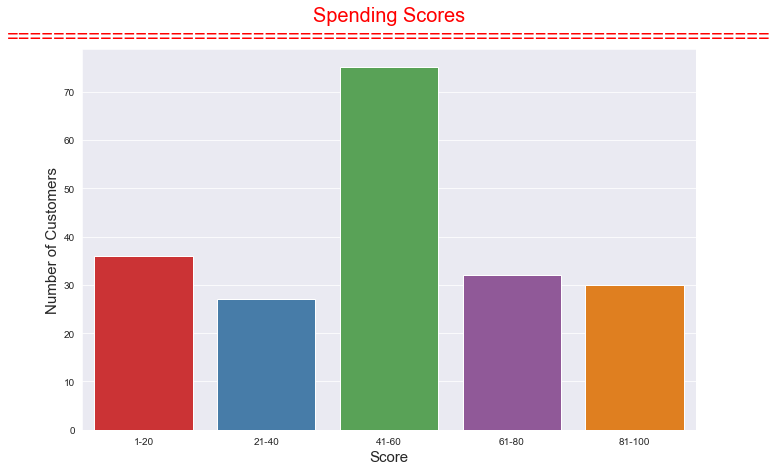

In [18]:
ss1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)]
ss21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
ss41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
ss61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
ss81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]

score_x = ["1-20", "21-40", "41-60", "61-80", "81-100"]
score_y = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(11,7))
sns.barplot(x=score_x, y=score_y,palette="Set1")
plt.title("Spending Scores\n=================================================================", fontsize=20, color="red")
plt.xlabel("Score", fontsize=15)
plt.ylabel("Number of Customers", fontsize=15)
plt.show()

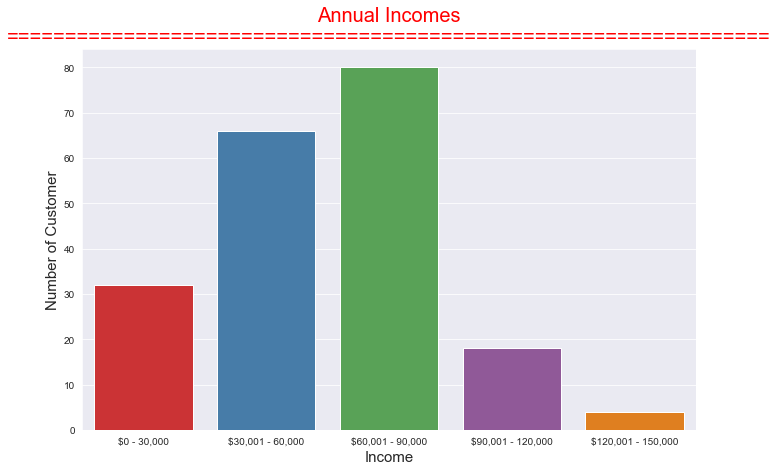

In [19]:
ai0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ai31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]

income_x = ["$0 - 30,000", "$30,001 - 60,000", "$60,001 - 90,000", "$90,001 - 120,000", "$120,001 - 150,000"]
income_y = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(11,7))
sns.barplot(x=income_x, y=income_y, palette="Set1")
plt.title("Annual Incomes\n=================================================================", fontsize=20, color="red")
plt.xlabel("Income", fontsize=15)
plt.ylabel("Number of Customer", fontsize=15)
plt.show()

In [21]:
df_scaled = df[["Age","Annual Income (k$)","Spending Score (1-100)"]]
scaler = StandardScaler()
df_scaled_fit = scaler.fit_transform(df_scaled)

In [22]:
df_scaled_fit = pd.DataFrame(df_scaled_fit)
df_scaled_fit.columns = ["Age","Annual Income (k$)","Spending Score (1-100)"]
df_scaled_fit.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [23]:
variable_list = df_scaled_fit[["Annual Income (k$)","Spending Score (1-100)"]]

In [24]:
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(variable_list)

KMeans(max_iter=50, n_clusters=4)

In [25]:
kmeans.labels_

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

In [26]:
clusters = []
for i in range(1,11):
    km = KMeans(n_clusters=i, max_iter = 50).fit(variable_list)
    clusters.append(km.inertia_)

Text(0, 0.5, 'Inertia')

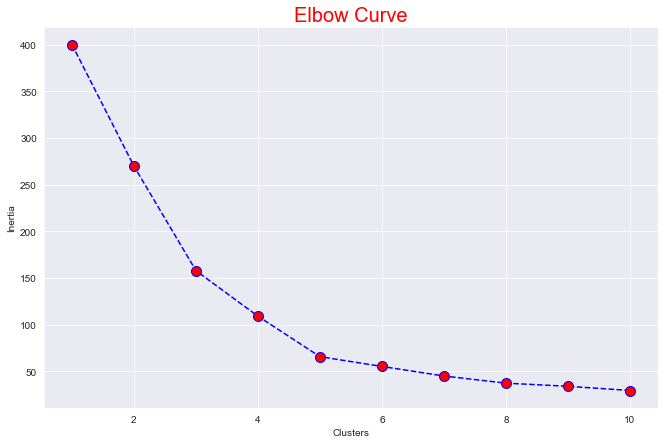

In [29]:
plt.figure(figsize=(11,7))
plt.plot(range(1,11),clusters,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Elbow Curve', fontsize=20, color="red")
plt.xlabel('Clusters')
plt.ylabel('Inertia')

In [30]:
kmeans = KMeans(n_clusters=5, max_iter = 50)

In [31]:
kmeans.fit(variable_list)

KMeans(max_iter=50, n_clusters=5)

In [32]:
kmeans.cluster_centers_

array([[-0.20091257, -0.02645617],
       [-1.32954532,  1.13217788],
       [-1.30751869, -1.13696536],
       [ 0.99158305,  1.23950275],
       [ 1.05500302, -1.28443907]])

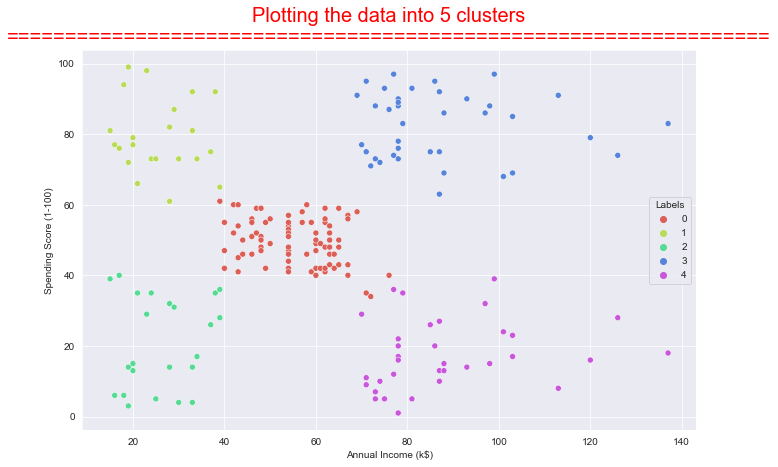

In [34]:
df['Labels'] = kmeans.labels_
plt.figure(figsize=(11,7))
plt.title("Plotting the data into 5 clusters\n=================================================================", fontsize=20, color="red")
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = df, hue='Labels', palette=sns.color_palette('hls', 5))
plt.show()

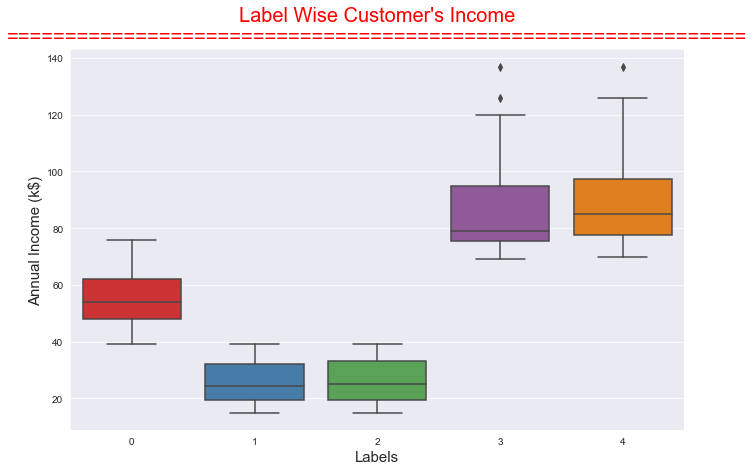

In [38]:
plt.figure(figsize=(11,7))
sns.boxplot(x='Labels', y='Annual Income (k$)', data=df, palette="Set1")
plt.title("Label Wise Customer's Income\n===============================================================", fontsize=20, color="red")
plt.xlabel(xlabel="Labels", fontsize=15)
plt.ylabel(ylabel="Annual Income (k$)",fontsize=15)
plt.show()

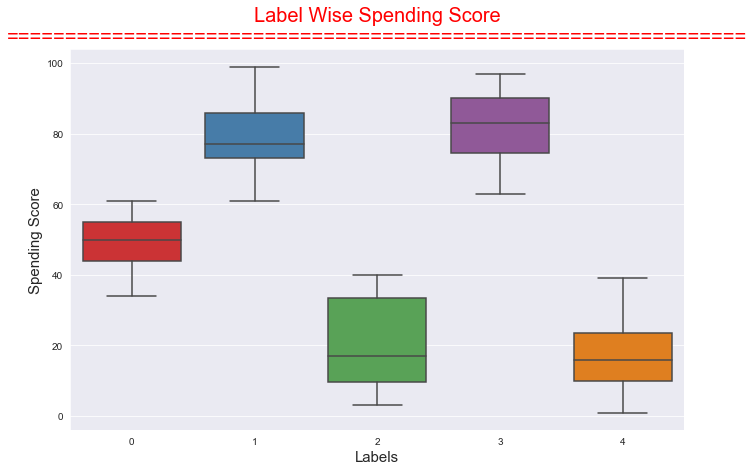

In [39]:
plt.figure(figsize=(11,7))
sns.boxplot(x='Labels', y='Spending Score (1-100)', data=df, palette="Set1")
plt.title("Label Wise Spending Score\n===============================================================", fontsize=20, color="red")
plt.xlabel(xlabel="Labels", fontsize=15)
plt.ylabel(ylabel="Spending Score",fontsize=15)
plt.show()

In [41]:
cust1 = df[df.Labels==0]
print("The number of customers in 1st group = ", len(cust1))
print("The Customer Id are - ", cust1.CustomerID.values)
print("============================================================================================\n")

cust2 = df[df.Labels==1]
print("The number of customers in 2nd group = ", len(cust2))
print("The Customer Id are - ", cust2.CustomerID.values)
print("============================================================================================\n")

cust3 = df[df.Labels==2]
print("The number of customers in 3rd group = ", len(cust3))
print("The Customer Id are - ", cust3.CustomerID.values)
print("============================================================================================\n")

cust4 = df[df.Labels==3]
print("The number of customers in 4th group = ", len(cust4))
print("The Customer Id are - ", cust4.CustomerID.values)
print("============================================================================================\n")

cust5 = df[df.Labels==4]
print("The number of customers in 5th group = ", len(cust5))
print("The Customer Id are - ", cust5.CustomerID.values)
print("============================================================================================\n")

The number of customers in 1st group =  81
The Customer Id are -  [ 44  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 127 133 143]

The number of customers in 2nd group =  22
The Customer Id are -  [ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 46]

The number of customers in 3rd group =  23
The Customer Id are -  [ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45]

The number of customers in 4th group =  39
The Customer Id are -  [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194
 196 198 200]

The number of customers in 5th group =  35
The Customer Id are -  [125 129 131 135 137 139 141 145 147 